In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

## reading the dataset

In [2]:
df=pd.read_csv('raw_sales.csv')

In [3]:
df

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3
...,...,...,...,...,...
29575,2019-07-25 00:00:00,2900,500000,unit,3
29576,2019-07-25 00:00:00,2612,560000,unit,2
29577,2019-07-26 00:00:00,2912,464950,unit,2
29578,2019-07-26 00:00:00,2601,589000,unit,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  object
 4   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [5]:
df.describe()

,postcode,price,bedrooms
count,29580.000000,2.958000e+04,29580.000000
mean,2730.249730,6.097363e+05,3.250169
std,146.717292,2.817079e+05,0.951275
min,2600.000000,5.650000e+04,0.000000
25%,2607.000000,4.400000e+05,3.000000
50%,2615.000000,5.500000e+05,3.000000
75%,2905.000000,7.050000e+05,4.000000
max,2914.000000,8.000000e+06,5.000000


In [6]:
df.shape

(29580, 5)

In [7]:
df.columns

Index(['datesold', 'postcode', 'price', 'propertyType', 'bedrooms'], dtype='object')

  ## EDA

In [8]:
from pandas_profiling import ProfileReport
report=ProfileReport(df)
report

C:\Users\SBMCODED\AppData\Local\Temp\ipykernel_10984\2108526697.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

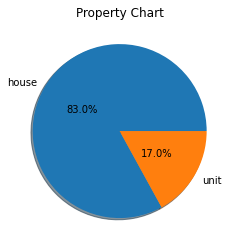

In [9]:
property_type_percentage = df['propertyType'].value_counts()
ax = plt.subplots()
ax = plt.pie(x=property_type_percentage, autopct="%.1f%%", labels=df['propertyType'].value_counts().keys(), pctdistance=0.5,shadow=True )
ax = plt.title('Property Chart')
plt.show()

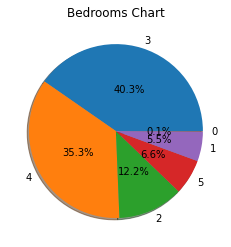

In [10]:
bedrooms_percentage = df['bedrooms'].value_counts()
ax = plt.subplots()
ax = plt.pie(x=bedrooms_percentage, autopct="%.1f%%", labels=df['bedrooms'].value_counts().keys(), pctdistance=0.5,shadow=True )
ax = plt.title('Bedrooms Chart')
plt.show()

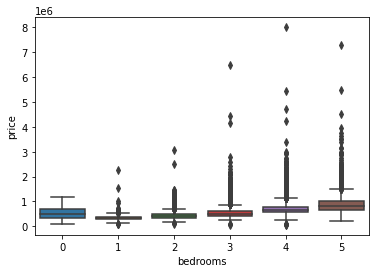

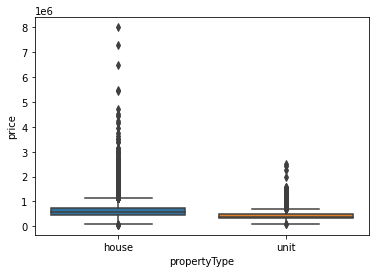

In [11]:
sns.boxplot(x="bedrooms", y="price", data=df)
plt.show()

sns.boxplot(x="propertyType", y="price", data=df)
plt.show()

## DATA PREPROCESSING

In [12]:
# Creating another dataset so we can re-use the original if we need it
df_grouped = df.copy()
df_grouped['count'] = 1


In [13]:
#Converting string to date and creating some adiction columns based on the date
df_grouped['datesold'] = pd.to_datetime(df_grouped['datesold'])
df_grouped = df_grouped.sort_values(by=['datesold'])
df_grouped['month'] = df_grouped['datesold'].dt.month
df_grouped['year'] = df_grouped['datesold'].dt.year
df_grouped['date'] = df_grouped.apply(lambda x: str(x['year']) + '/' + "{:02d}".format(x['month']), axis = 1)

## The last column created "date" is formated like year/month because with that, we can compare dates easily, so sorting and comparing can be executed based on date, without needing to deal with actual dates

In [14]:
import itertools

# This function will create a "dummy" sale for every month, type of propert and number of bedrooms
def add_group_row(df, columns):
    value_counts_columns = []
    for column in columns:
        value_counts_columns.append(df[column].value_counts().index)
    list_combinations = list(itertools.product(*value_counts_columns))
    for index, row in enumerate(list_combinations):
        list_combinations[index] = [i for i in row]
        list_combinations[index].append(0)
        list_combinations[index].append(1)
    return list_combinations

columns = ['date','propertyType','bedrooms']
rows_to_add = add_group_row(df_grouped, columns)

In [15]:
 ## We create a data frame for our dummies to concat with the original dataset 
columns_names = ['date','propertyType','bedrooms', 'price', 'count']
df_rows_to_add = pd.DataFrame(rows_to_add, columns=columns_names)
df_rows_to_add.head()

,date,propertyType,bedrooms,price,count
0,2017/11,house,3,0,1
1,2017/11,house,4,0,1
2,2017/11,house,2,0,1
3,2017/11,house,5,0,1
4,2017/11,house,1,0,1


In [16]:
df_grouped = df_grouped[columns_names]
df_grouped.head()

,date,propertyType,bedrooms,price,count
0,2007/02,house,4,525000,1
1,2007/02,house,3,290000,1
2,2007/03,house,3,328000,1
3,2007/03,house,4,380000,1
4,2007/03,house,3,310000,1


In [17]:
# Concatening the original dataset with the dummies
df_grouped_new = pd.concat([df_grouped, df_rows_to_add])
df_grouped_new = df_grouped_new.reset_index(drop=True)
df_grouped_new

,date,propertyType,bedrooms,price,count
0,2007/02,house,4,525000,1
1,2007/02,house,3,290000,1
2,2007/03,house,3,328000,1
3,2007/03,house,4,380000,1
4,2007/03,house,3,310000,1
...,...,...,...,...,...
31375,2007/02,unit,4,0,1
31376,2007/02,unit,2,0,1
31377,2007/02,unit,5,0,1
31378,2007/02,unit,1,0,1


In [18]:
# Here we make the price mean manually
df_grouped_new = df_grouped_new.groupby(by=['date', 'propertyType', 'bedrooms']).sum()
df_grouped_new['price_mean'] = df_grouped_new.apply(lambda x: x['price'] if x['count'] == 1 else x['price'] / (x['count'] - 1), axis= 1)
df_grouped_new.head()

price  count  price_mean
date    propertyType bedrooms                           
2007/02 house        0              0      1         0.0
                     1              0      1         0.0
                     2              0      1         0.0
                     3         290000      2    290000.0
                     4         525000      2    525000.0

You can think, "why making the mean manually if you can groupby and use .mean()?", well, that's because i added the dummy sale, and with that, if we use the mean from the groupby we would have a deslocated mean because of the zero inserted previously, so we need to make it manully so we don't have this problem

And here is why we have a "count" column, because when we use the sum of the groupby, we can have how many registers we have for each month!



In [19]:
# Create first date and last date based on the dates available on the dataset
first_date = df_grouped_new.index[0][0]
year, month = first_date.split('/')
first_year, first_month = int(year), int(month)
last_date = df_grouped_new.index[-1][0]
year, month = last_date.split('/')
last_year, last_month = int(year), int(month)


In [20]:
# Take all the values for the columns indicated
value_counts_property = df_grouped['propertyType'].value_counts().index
value_counts_bedrooms = df_grouped['bedrooms'].value_counts().index

#Combine all the values from value_counts_property and value_counts_bedrooms
first_indexes = list(itertools.product([first_date],value_counts_property, value_counts_bedrooms))

# This function replace all the initial values of each type of property if they're 0 with the closeset month with any sale
# whith the same type of property
for index in first_indexes:
    # Verify if the first element just have one count, meaning it's just the dummy we putted before
    if df_grouped_new.loc[index]['count'] == 1:
        origin_property_type = index[1]
        origin_bedrooms = index[2]
        # search for the most recent sale of the same type to replace in the price_mean
        for year in range(first_year, last_year + 1):
            begin_month = 1
            end_month = 12
            if year == first_year:
                begin_month = first_month + 1
            elif year == last_year:
                end_month = last_month
            for month in range(begin_month, end_month + 1):
                current_date = str(year) + '/' + "{:02d}".format(month)
                current_row = df_grouped_new.loc[(current_date, origin_property_type, origin_bedrooms)]
                if current_row['price_mean'] > 0:
                    df_grouped_new.at[index, 'price_mean'] = current_row['price_mean']
                    break
            if df_grouped_new.loc[index]['price_mean'] > 0:
                break
            
df_grouped_new.head()

price  count  price_mean
date    propertyType bedrooms                           
2007/02 house        0              0      1    415000.0
                     1              0      1    327000.0
                     2              0      1    320000.0
                     3         290000      2    290000.0
                     4         525000      2    525000.0

Here we have the first step of our processing, were we replace the first value of the first month for each type of propert. Why we do that? Because we will need this value for the next step, and because if we don't have any sale on the first month, we can assume the most recent value can be used on there

In [21]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Function to make a mean between the current month and the previous one
# and to replace any zeros with the previous value of price_mean
for index in df_grouped_new.index:
    if index[0] == first_date:
        continue
    date_obj = datetime.strptime(index[0], '%Y/%m')
    previous_date_obj = date_obj - relativedelta(months=1)
    previous_date_str = str(previous_date_obj.year) + '/' + "{:02d}".format(previous_date_obj.month)
    previous_index = (previous_date_str, index[1], index[2])
    if df_grouped_new.loc[index]['count'] == 1:
        df_grouped_new.at[index, 'price_mean'] = df_grouped_new.loc[previous_index]['price_mean']
    else:
         df_grouped_new.at[index, 'price_mean'] = (df_grouped_new.loc[previous_index]['price_mean']
                                                + df_grouped_new.loc[index]['price_mean'])/2

df_grouped_new.head(20)

price  count  price_mean
date    propertyType bedrooms                           
2007/02 house        0              0      1    415000.0
                     1              0      1    327000.0
                     2              0      1    320000.0
                     3         290000      2    290000.0
                     4         525000      2    525000.0
                     5              0      1    667500.0
        unit         0              0      1     90000.0
                     1              0      1    351000.0
                     2              0      1    300000.0
                     3              0      1    480000.0
                     4              0      1    550000.0
                     5              0      1   1490000.0
2007/03 house        0              0      1    415000.0
                     1              0      1    327000.0
                     2              0      1    320000.0
                     3         638000      3    304500.0
                     4         380000      2    452500.0
                     5              0      1    667500.0
        unit         0              0      1     90000.0
                     1              0      1    351000.0

On the second step, we fill the zeroes in our dataset with the previous value of price_mean, and we calculate the mean between the current month and the previous, so we have a more suttle curvuture for our values of prices

In [22]:
window = 5

In [23]:
# Here we create our feature and target datasets with the structure of a time series
df_grouped_chaged = df_grouped_new.reset_index().sort_values(by=['propertyType', 'bedrooms', 'date'])
feature, target = [], []
bedrooms =  df_grouped_chaged.iloc[0]['bedrooms']
# This value is the window size we are using
index = window
while(index < df_grouped_chaged.shape[0]):
    if bedrooms != df_grouped_chaged.iloc[index]['bedrooms']:
        bedrooms = df_grouped_chaged.iloc[index]['bedrooms']
        index = index + window
    feature.append(df_grouped_chaged.iloc[index - window: index]['price_mean'].to_numpy())
    target.append(df_grouped_chaged.iloc[index][['price_mean', 'date']].to_numpy())
    index = index + 1
feature = np.array(feature)
target = np.array(target)  

In this part, i create our feature and target based on the dataset we made earlier. The way we create this is similar to a normal process of creating a time series dataset, the only difference is that  bring the date with the target, so i can separate train and test based on the date

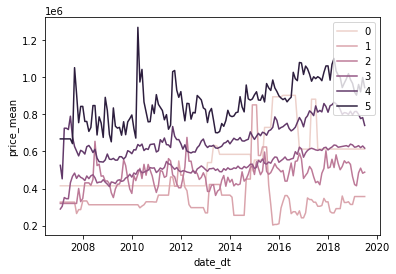

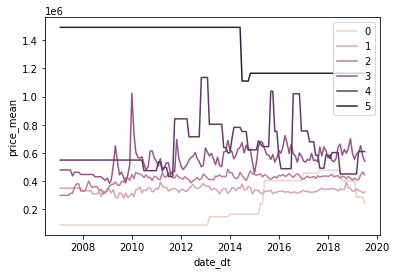

In [24]:
df_aux = df_grouped_new.reset_index()
df_aux['date_dt'] = pd.to_datetime(df_aux['date'], format='%Y/%m') 
sns.lineplot(data = df_aux.query('propertyType == "house"'), x = 'date_dt', y = 'price_mean', hue = 'bedrooms')
plt.legend(loc='upper right')
plt.show()

sns.lineplot(data = df_aux.query('propertyType == "unit"'), x = 'date_dt', y = 'price_mean', hue = 'bedrooms')
plt.legend(loc='upper right')
plt.show()

## using regression 

## regression with time series 

In [25]:
size_test_perc = 0.9

In [26]:
# creating the separation so we can create our test and train datasets
size_test = int(df_grouped['date'].value_counts().index.shape[0] * size_test_perc)
separation_date = df_grouped['date'].value_counts().index.sort_values()[size_test]

In [27]:
# This function creates our train and test dataset based on the date inserted on the target
x_train, y_train, x_test, y_test = [], [], [], []
for i,t in enumerate(target):
    if t[1] <= separation_date:
        x_train.append(feature[i])
        y_train.append(target[i][0])
    else:
        x_test.append(feature[i])
        y_test.append(target[i][0])

In [28]:
x_train, x_test = np.array(x_train), np.array(x_test)
y_train, y_test = np.array(y_train).reshape(-1, 1), np.array(y_test).reshape(-1, 1)

In [29]:
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow import nn

In [30]:
# Scaling feature and target separately
scaler_feature = StandardScaler()
scaler_feature.fit(x_train)
x_train = scaler_feature.transform(x_train)
x_test = scaler_feature.transform(x_test)

# Reshaping features for the LSTM
x_train, x_test = x_train.reshape(-1,window,1), x_test.reshape(-1,window,1)

scaler_target = StandardScaler()
scaler_target.fit(y_train)
y_train = scaler_target.transform(y_train)
y_test = scaler_target.transform(y_test)

In [31]:
model = keras.Sequential()
model.add(keras.layers.LSTM(units = 128, return_sequences = True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.LSTM(units = 128))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(1))

model.compile(loss='mean_squared_error', optimizer='RMSProp')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 128)            66560     
                                                                 
 dropout (Dropout)           (None, 5, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 198,273
Trainable params: 198,273
Non-trainable params: 0
_________________________________________________________________


In [32]:
result = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
50/50 [==============================] - 24s 102ms/step - loss: 0.1312 - val_loss: 0.0214
Epoch 2/10
50/50 [==============================] - 1s 28ms/step - loss: 0.0729 - val_loss: 0.0318
Epoch 3/10
50/50 [==============================] - 1s 29ms/step - loss: 0.0643 - val_loss: 0.0902
Epoch 4/10
50/50 [==============================] - 2s 31ms/step - loss: 0.0606 - val_loss: 0.0660
Epoch 5/10
50/50 [==============================] - 2s 31ms/step - loss: 0.0572 - val_loss: 0.0189
Epoch 6/10
50/50 [==============================] - 2s 35ms/step - loss: 0.0523 - val_loss: 0.0236
Epoch 7/10
50/50 [==============================] - 2s 32ms/step - loss: 0.0494 - val_loss: 0.0180
Epoch 8/10
50/50 [==============================] - 2s 42ms/step - loss: 0.0500 - val_loss: 0.0127
Epoch 9/10
50/50 [==============================] - 3s 58ms/step - loss: 0.0453 - val_loss: 0.0152
Epoch 10/10
50/50 [==============================] - 2s 46ms/step - loss: 0.0425 - val_loss: 0.0228


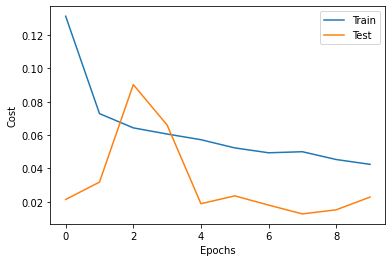

In [33]:
# Function to print the results of the fit process
def print_loss(result):
    plt.plot(result.history['loss'])
    plt.plot(result.history['val_loss'])
    plt.legend(['Train', 'Test'])
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.show()

print_loss(result)

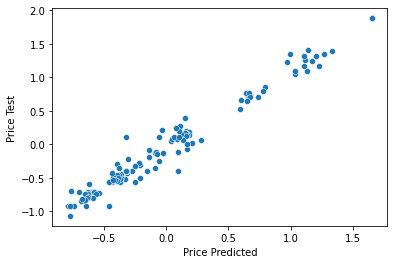

In [34]:
y_predicted = model.predict(x_test)

ax = sns.scatterplot(x=y_predicted[:,0], y=y_test[:,0])
ax.set_ylabel('Price Test')
ax.set_xlabel('Price Predicted')
plt.show()

In [35]:
df

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3
...,...,...,...,...,...
29575,2019-07-25 00:00:00,2900,500000,unit,3
29576,2019-07-25 00:00:00,2612,560000,unit,2
29577,2019-07-26 00:00:00,2912,464950,unit,2
29578,2019-07-26 00:00:00,2601,589000,unit,2


In [36]:
from sklearn.preprocessing import OneHotEncoder

oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(df[["propertyType"]])
temp = pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_[0], index=df.index)
df = pd.concat([df, temp], axis=1)
df = df.drop(columns=['propertyType'])
df.head()

,datesold,postcode,price,bedrooms,house,unit
0,2007-02-07 00:00:00,2607,525000,4,1.0,0.0
1,2007-02-27 00:00:00,2906,290000,3,1.0,0.0
2,2007-03-07 00:00:00,2905,328000,3,1.0,0.0
3,2007-03-09 00:00:00,2905,380000,4,1.0,0.0
4,2007-03-21 00:00:00,2906,310000,3,1.0,0.0


In [37]:
# Including information about the year and month to the dataset so we can use as a feature
df['datesold'] = pd.to_datetime(df['datesold'])
df['month'] = df['datesold'].dt.month
df['year'] = df['datesold'].dt.year
df['day'] = df['datesold'].dt.day

df.head()

,datesold,postcode,price,bedrooms,house,unit,month,year,day
0,2007-02-07,2607,525000,4,1.0,0.0,2,2007,7
1,2007-02-27,2906,290000,3,1.0,0.0,2,2007,27
2,2007-03-07,2905,328000,3,1.0,0.0,3,2007,7
3,2007-03-09,2905,380000,4,1.0,0.0,3,2007,9
4,2007-03-21,2906,310000,3,1.0,0.0,3,2007,21


In [38]:
# Droping the columns we are not using on our feature to avoid problems
feature_columns = df.drop(columns=['postcode', 'price', 'datesold', 'day']).columns
feature = df[feature_columns]
target = df['price']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

scaler_feature = StandardScaler()
scaler_feature.fit(X_train)
X_train = scaler_feature.transform(X_train)
X_test = scaler_feature.transform(X_test)

y_train, y_test = y_train.values.reshape(-1,1), y_test.values.reshape(-1,1)

scaler_target = StandardScaler()
scaler_target.fit(y_train)
y_train = scaler_target.transform(y_train)
y_test = scaler_target.transform(y_test)

In [40]:
model = keras.Sequential()
model.add(keras.layers.Dense(64, input_dim=X_train.shape[1], activation=nn.relu))
model.add(keras.layers.Dense(64,activation=nn.relu))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                384       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________


In [41]:
result = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
740/740 [==============================] - 4s 3ms/step - loss: 0.7269 - val_loss: 0.7230
Epoch 2/50
740/740 [==============================] - 3s 4ms/step - loss: 0.7121 - val_loss: 0.7211
Epoch 3/50
740/740 [==============================] - 3s 5ms/step - loss: 0.7114 - val_loss: 0.7230
Epoch 4/50
740/740 [==============================] - 3s 4ms/step - loss: 0.7105 - val_loss: 0.7240
Epoch 5/50
740/740 [==============================] - 2s 3ms/step - loss: 0.7092 - val_loss: 0.7210
Epoch 6/50
740/740 [==============================] - 3s 4ms/step - loss: 0.7083 - val_loss: 0.7196
Epoch 7/50
740/740 [==============================] - 2s 3ms/step - loss: 0.7102 - val_loss: 0.7185
Epoch 8/50
740/740 [==============================] - 3s 4ms/step - loss: 0.7111 - val_loss: 0.7187
Epoch 9/50
740/740 [==============================] - 3s 3ms/step - loss: 0.7078 - val_loss: 0.7191
Epoch 10/50
740/740 [==============================] - 3s 5ms/step - loss: 0.7076 - val_loss: 0.7210

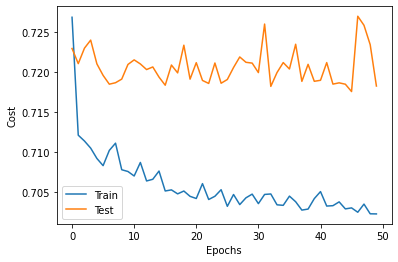

In [42]:
print_loss(result)

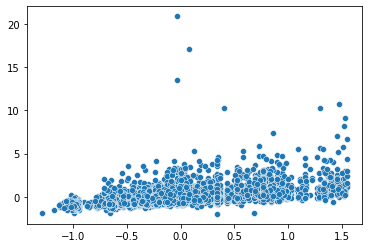

In [43]:
y_predicted = model.predict(X_test)

ax = sns.scatterplot(x=y_predicted[:,0], y=y_test[:,0])